## Algorithms in Molecular Biology


First of all, we import all required packages for running the notebook.

In [1]:
import random
import timeit
import numpy as np
from itertools import product, combinations
import matplotlib.pyplot as plt

The *read_file* is a helper function that returns all the lines of a file as a list.

In [2]:
def read_file(filename):
    strings = []
    f = open(filename, 'r')
    for line in f:
        line = line.strip()
        strings.append(line)
    return(strings)

The *pattern_count()* function, is needed for the implementation of *frequent_words()* function.
*pattern_count()* calculates the frequency of a *specific pattern* in a *given text*. It uses a sliding window with **step=1** and **length=length of pattern**, and compares the sequence of the text and the sequence of the pattern for **exact similarity**.

In [3]:
def pattern_count(text, pattern):
    count = 0
    pattern_length = len(pattern)
    text_length = len(text)
    for i in range(0, text_length - pattern_length + 1):
        if text[i:i+pattern_length] == pattern:
            count = count + 1
    return count

The *frequent_words* function finds the **most frequent patterns of length k** that appear in **given text**.
The steps of the function are as follows:

1. We create an empty set (`frequent_patterns`) and a list (`count`) to hold the frequencies of the patterns. The count is of **length = (length of the text) - (length of the pattern we are searching for = k) + 1** and we initialize it using zeros.

2. Using a sliding window of step=1 and window=k, we check for every pattern in the text its frequency, using the *pattern_count()* function. Then we update the `count` list with the frequency of the pattern.

3. After finishing iterating over the text, we have calculated the frequencies of all the patterns found in the text. We find the **maximum frequency** found in the text.

4. Finally, we find the patterns, whose frequency equals to maximum frequency and add them to the `frequent_patterns` set.

5. The *frequent_words()* function returns the patterns that have the maximum drequency, and the maximum frequency.

In [4]:
def frequent_words(text, k):
    # initialization
    frequent_patterns = set([])
    text_length = len(text)
    count=np.zeros(text_length - k + 1)

    # calculate word frequency
    for i in range(0, text_length - k + 1):
        pattern = text[i:i + k]
        count[i] = pattern_count(text, pattern)

    # maximum frequency
    max_count = max(count)

    # add words with max frequency to frequent_patterns
    for i in range(0, text_length - k + 1):
        if count[i] == max_count:
            frequent_patterns.add(text[i:i + k])
    
    return frequent_patterns, max_count

### **Task 1:** The *frequent_words_dict* function

The *frequent_words_dict()* function, uses the helper *pattern_to_index* funtion, which given a **specific pattern** of **length k**, that is generated from specific symbols, in our case the **4 DNA bases (A, T, G, C)**, we can
infer its index.

Given $4$ symbols, we can generate $4^k$ patterns of length $k$. Every element of this $4^k$ array, has an index that represents its position in the array. Given the sequence of the pattern, we can find its index/position in the array using the following equation:

$pattern\_index = c_{k-1} + \sum_{i=0}^{k-2} c_i 4^{k-i-1}$

where $c_i$ is equal to the index of the symbol that is in the $i$-th position of the pattern and $k$ is the length of the pattern. The pattern "ATG", that is generated by the symbols A, T, C and G, with indices $c_A=0$, $c_T=1$, $c_C=2$ and $c_G=3$ respectively, would have the index of $ATG\_index = c_2 + c_0 4^{3-0-1} + c_1 4^{3-1-1} = 3+0+1*4 = 7$.

In [5]:
def pattern_to_index(pat, k):
    bases = ["A", "T", "C", "G"]
    encoded_index = 0
    for i, symbol in enumerate(pat[:-1]):
        encoded_index += bases.index(symbol) * 4**(k-i-1)
    return encoded_index + bases.index(pat[-1])

We implement the *FrequentWordsDict* function, as suggested in Lecture 3, as follows:

1. We create again an empty set `frequent_patterns`, in which we add the patterns with the maximum frequencies in the text.
We create the `farray`, that has $4^k$ elements, and will hold the frequencies of the patterns. We initialize the farray to zeros.
We create an empty dictionary to hold the patterns and their indices respectively.

2. We iterate through the text using the sliding window technique, with step=1 and window=k=length of the pattern. For
every pattern, using the *PatternToIndex* function, we calculate its index. We hold the index as key in the `known_patterns`
dictionary and the respective pattern as value. We also update the frequency of the specific index in the `farray`, by
adding 1 to its position.

3. By iterating through the keys and values of the `known_patterns` dictionary, for every index we check its frequency
by checking the respective position in the `farray`. If the frequency is bigger that a max_count variable, we add the
pattern in the `frequent_patterns` set.

4. The *FrequentWordsDict* function returns the patterns that have the maximum drequency, and the maximum frequency.

In [6]:
def frequent_words_dict(text, k):
    
    # initialization
    frequent_patterns = set([])
    farray = np.zeros(4**k)
    known_patterns = {}

    # update the dict and the farray by iterating through the text
    for i in range(0, len(text) - k + 1):
        pattern = text[i:i + k]
        idx = pattern_to_index(pattern, k)
        known_patterns[idx] = pattern
        farray[idx] += 1.0

    # calculate the maximum frequencies
    max_count = -1
    for idx, pat in known_patterns.items():
        if max_count == farray[idx]:
            frequent_patterns.add(pat)
        elif max_count < farray[idx]:
            max_count = farray[idx]
            frequent_patterns.clear()
            frequent_patterns.add(pat)

    return frequent_patterns, max_count

### **Task 2:** Compare the performance of functions *frequent_words_dict* and *frequent_words*.

First, we use the *create_rand_str* function, to generate random strings. The *create_rand_str*, takes as input the symbols that will be used, in our case the DNA bases, and the length of the string that we want to generate.

In [7]:
def create_rand_str(alphabet, str_len):
    rand_str = "" 
    chr_cnt = 0
    while chr_cnt < str_len:
        rand_str = rand_str + alphabet[random.randint(0, len(alphabet) - 1)]
        chr_cnt = chr_cnt + 1
    return rand_str

We create random strings of different sizes based on the DNA bases (A, T, C, G). More specifically, we create 10 strings of length:
- $10$ bases,
- $100$ bases,
- $500$ bases,
- $1{,}000$ bases,
- $5{,}000$ bases, and
- $10{,}000$ bases.

For each length, we hold the 10 generated string in a file.

In [8]:
bases = ["A", "T", "C", "G"]
string_lengths = [10, 50, 100, 500, 1000]

for string_length in string_lengths:
    with open('../data/dna-' + str(string_length) + '.dat', 'w') as file:
        for i in range(10):
            file.write(create_rand_str(bases, string_length) + '\n')

**Five files**, `dna-10.txt`,`dna-50.txt`, `dna-100.txt`, `dna-500.txt`,`dna-1000.txt`,
were generated.

We now compare the performance of functions *FrequentWordsDict* and *FrequentWords*, using the generated strings and searching for patterns of length **3, 6 and 9**. For each kmer, we calculate the average performance of each function over the 10 generated strings of the same length.

Due to lack of computational power (my laptop is pretty old), I ran the algorithms for smaller string lengths. However, you can ran it for bigger string lengths by just uncommenting the commented line in the previous cell, and commenting the above line.

In [9]:
kmers = [3, 6, 9]

In [10]:
times = {}

for var in kmers:
    print('Algorithm running in search for a ' + str(var) + '-mer...')
    
    times[var] = ([], [])
    for string_length in string_lengths:
        
        filename = '../data/dna-' + str(string_length) + '.dat'
        strings = read_file(filename)
        
        print('...in the ' + str(filename) + ' file.')
        for string in strings:
            fwtime = []
            fwdtime = []
            start=timeit.default_timer()
            position=frequent_words(string, var)
            stop=timeit.default_timer()
            fwtime.append(stop-start)

            start=timeit.default_timer()
            position=frequent_words_dict(string, var)
            stop=timeit.default_timer()
            fwdtime.append(stop-start)

        times[var][0].append(np.mean(fwtime))
        times[var][1].append(np.mean(fwdtime))

Algorithm running in search for a 3-mer...
...in the ../data/dna-10.dat file.
...in the ../data/dna-50.dat file.
...in the ../data/dna-100.dat file.
...in the ../data/dna-500.dat file.
...in the ../data/dna-1000.dat file.
Algorithm running in search for a 6-mer...
...in the ../data/dna-10.dat file.
...in the ../data/dna-50.dat file.
...in the ../data/dna-100.dat file.
...in the ../data/dna-500.dat file.
...in the ../data/dna-1000.dat file.
Algorithm running in search for a 9-mer...
...in the ../data/dna-10.dat file.
...in the ../data/dna-50.dat file.
...in the ../data/dna-100.dat file.
...in the ../data/dna-500.dat file.
...in the ../data/dna-1000.dat file.


We measure the performance with respect to their execution time. We plot the length of the string with respect to
execution time, to observe what happens if for the **same kmer**, we **increase the lenght of the string**.

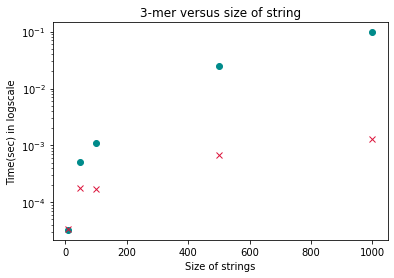

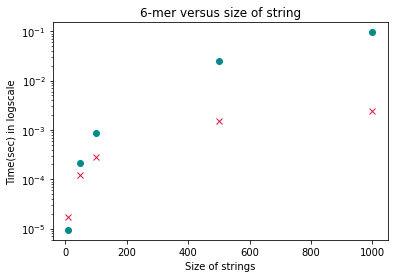

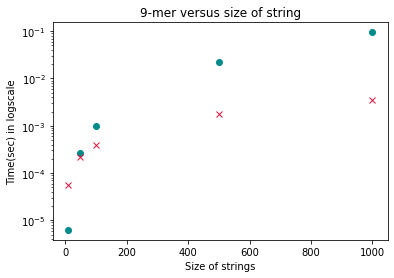

In [11]:
for mer in kmers:
    plt.title(str(mer) + '-mer versus size of string')
    plt.xlabel('Size of strings')
    plt.ylabel('Time(sec) in logscale')
    plt.yscale("log")
    plt.plot(string_lengths,times[mer][0],'o', color='darkcyan')
    plt.plot(string_lengths,times[mer][1],'x',color='crimson')
    plt.show()

It is obvious from the plots above that as the string length increases, the *FrequenWordsDict* is faster than the *FrequenWords*, which is expected, since the the original *FrequenWords* has a complextity of **O(N$^2$k)**, while the *FrequenWordsDict* has a complexity of **O(N)**.

### **Task 3:** The problem "find all most frequent $k$-mers with up to d mismatches in a DNA string".

First, we have to implement the *hamming_distance* function, to calculate the distance
between two dna strings. In our case, it will be used to calculate the distance between
the window in the sequence, and the pattern under examination each time.

The *hamming_distance* returns the number of mismatches between two strings, after
comparing the same positions of the two strings.

In [12]:
def hamming_distance(string1, string2):
    count = 0
    for i in range(len(string1)):
        if string1[i] != string2[i]:
            count += 1
    return(count)

#### First Step
We have to modify *frequent_words_dict* in order to calculate the frequency of patterns that have **d** mismatches.
Since, our implementation of  *frequent_words_dict* in Task 1, uses the *pattern_to_index* encoding, and the reverse
function, that generates the pattern given just the index was difficult to be implemented, we implented from the
*frequen_words_dict_mm* functions as follows:

1. We create an empty set `frequent_patterns`, that will hold the patterns with the maximum frequencies.
Using the `product()` function of the `itertools` library, we generate the $4^k$ combinations of the DNA bases.

2. We create a dictionary, that holds the patterns generated of the `product` as keys, and initialize their values to zeros.

3. We iterate in the given string (text), using the slide window technique, as described previously. We calulate the hamming distance of each pattern with the keys of the `farray` dictionary, by iterating in the dictionary. If the pattern and the key have a **hamming_distance $<=$ d, where d is the number of the allowed mismatches, we update the key's value, which is its frequency by adding 1.

4. We find the maximum frequency, and the patterns that have this frequency.

5. The *FrequentWordsDictMM* returns the patterns that have the maximum drequency, and the maximum frequency.

In [13]:
def frequent_words_dict_mm(text, k, d):
    bases = ["A", "T", "C", "G"]
    frequent_patterns = set([])

    # generate the keys of the dict
    combs = product(bases, repeat=k)

    # initialize the dict to zeros
    farray = {}
    for base in list(combs):
        key = ''.join(base)
        farray[key] = 0

    # update the dict, iterating through the text
    for i in range(0, len(text) - k + 1):
        pattern = text[i:i + k]
        for key in farray.keys():
            if hamming_distance(key, pattern) <= d:
                farray[key] += 1.0

    max_count = max(farray.values())

    # find the pattern with the max frequency
    for l, v in farray.items():
        if v == max_count:
            frequent_patterns.add(l)

    return frequent_patterns, max(farray.values())

#### Second step
In order to optimize the *frequent_words_dict_mm*, so that it does not have to create $4^k$ patterns, we first have to implement the auxiliary *immediate_neighbors* function. We implement the *immediate_neighbors*, as follows:

1. We define the symbols, from which the patterns are generated, that is, the DNA bases.

2. We create a set `Neighborhood` that will hold all the generated patterns including the original one.

3. We generate all the unique combinations of the indices for a given sequence that has the length of the given pattern, using the `combinations` function of `itertools`. We store the results in the `indices` list.

4. We generate all the possible combinations of the DNA bases for a given mismatch $d$. We store the results in the `bases_product` list.

5. We iterate over the `indices` and the `bases_product` lists, at the same time, and for each index, meaning each position in the pattern, and for each base/base combination, we generate all the possible combinations allowing $d$ mismatches and add them to the `Neighborhood`. 

The *immediate_neighbors* function, returns the "neighborhood" fo a **given pattern**, allowing **d mismatches**.

In [14]:
def immediate_neighbors(pat, d):
    bases = ["A", "T", "C", "G"]
    neighborhood = set()
    neighborhood.add(pat)
    indices = list(combinations(range(len(pat)), d))
    bases_product = list(product(bases, repeat=d))

    for idx_set in indices:
        for bases_set in bases_product:
            temp = list(pat)
            for ii, base in zip(idx_set, bases_set):
                temp[ii] = base
            neighborhood.add(''.join(temp))
    return neighborhood

#### Third Step
We implement the optimized *frequent_words_opt_mm* function, as follows:

1. We create and empty set `frequent_patterns` that will hold the patterns with the highest frequencies.
We create an empty dictionary `cache`, that will hold the neighborhood for a given pattern, so that we will not have to
regenerate the neighborhood if we find the same pattern more than once.

2. We create the `initial_dict` and iterate over the string(text), using the slide window technique as described previously.
For each pattern:

    - we generate its neighborhood, using the *ImmediateNeighbors* function for \[1, d\] mismatches.
    - we hold it as key in the `initial_dict`, and update its value to 1.

3. We find the maximum value of the `initial_dict`, which corresponds to the highest frequency, and we add
the patterns that have the highest frequency in the `frequent_patterns`.

4. The *frequent_words_opt_mm* returns the patterns that have the maximum drequency, and the maximum frequency.

In [15]:
def frequent_words_opt_mm(text, k, d):
    
    # initialization
    frequent_patterns= set([])
    cache = {}

    # create and initialize the initial dict that holds the kmers existing in the text
    initial_dict = {}
    for i in range(0, len(text) - k + 1):
        pat = text[i:i + k]
        for dd in range(1, d + 1):
            if pat in cache and dd in cache[pat]:
                neighbors = cache[pat][dd]
            else:
                neighbors = immediate_neighbors(pat, dd)
                if pat in cache:
                    cache[pat][dd] = neighbors
                else:
                    cache[pat] = {dd: neighbors}
            for x in neighbors:
                if x not in initial_dict:
                    initial_dict[x] = 1
                else:
                    initial_dict[x] += 1
    
    # find the maximum frequency
    max_count = max(initial_dict.values())

    # find the patterns that have the maximum frequency
    for l, v in initial_dict.items():
        if v == max_count:
            frequent_patterns.add(l)

    return frequent_patterns, max_count

In this final step, we compare the *FrequentWordDictMM* and *FrequentWordOptMM*
functions. We use the same methodology as in Task 2. [^1] We compare the functions for
 three different values of mismatches \[1, 2, 3\]. We proceed, only if **d<k**.

However, from a biological point of view, we could say that if $d>k/2$, there is no
point in checking the specific altered pattern, since this will be a completely different
 pattern in comparison to the original one.

[^1]: We use smaller string sizes because of the computational power available.

In [16]:
bases = ["A", "T", "C", "G"]
mismatches = [1, 2, 3]
kmers = [2, 3, 5] # you can comment this line in order to run the next code cell for a 9-mer as well.
string_lengths = [10, 50, 100, 150, 200]

for string_length in string_lengths:
    with open('../data/dna-' + str(string_length) + '.dat', 'w') as file:
        for i in range(10):
            file.write(create_rand_str(bases, string_length) + '\n')

We hold the results in the dictionary `mm_times`, where for every kmer and for each number of mismatches allowed, we
store the average execution of time for each string length.

In [17]:
mm_times = {}
for var in kmers:
    print('Algorithm running in search for a ' + str(var) + '-mer')
    
    mm_times[var] = {}
    for mm in mismatches:
        print('..and allowing ' + str(mm) + ' mismatches.')
        
        if mm < var:
            mm_times[var][mm] = ([], [])
            for string_length in string_lengths:
                filename = '../data/dna-' + str(string_length) + '.dat'
                strings = read_file(filename)
                
                print('Here comes the ' + str(filename) + ' file..')
                for string in strings:
                    smmtime = []
                    ommtime = []
                    start=timeit.default_timer()
                    position=frequent_words_dict_mm(string, var, mm)
                    stop=timeit.default_timer()
                    smmtime.append(stop-start)

                    start=timeit.default_timer()
                    position=frequent_words_opt_mm(string, var, mm)
                    stop=timeit.default_timer()
                    ommtime.append(stop-start)

                mm_times[var][mm][0].append(np.mean(smmtime))
                mm_times[var][mm][1].append(np.mean(ommtime))
        else:
            print("...impossible it is.")

Algorithm running in search for a 2-mer
..and allowing 1 mismatches.
Here comes the ../data/dna-10.dat file..
Here comes the ../data/dna-50.dat file..
Here comes the ../data/dna-100.dat file..
Here comes the ../data/dna-150.dat file..
Here comes the ../data/dna-200.dat file..
..and allowing 2 mismatches.
...impossible it is.
..and allowing 3 mismatches.
...impossible it is.
Algorithm running in search for a 3-mer
..and allowing 1 mismatches.
Here comes the ../data/dna-10.dat file..
Here comes the ../data/dna-50.dat file..
Here comes the ../data/dna-100.dat file..
Here comes the ../data/dna-150.dat file..
Here comes the ../data/dna-200.dat file..
..and allowing 2 mismatches.
Here comes the ../data/dna-10.dat file..
Here comes the ../data/dna-50.dat file..
Here comes the ../data/dna-100.dat file..
Here comes the ../data/dna-150.dat file..
Here comes the ../data/dna-200.dat file..
..and allowing 3 mismatches.
...impossible it is.
Algorithm running in search for a 5-mer
..and allowing 1 mi

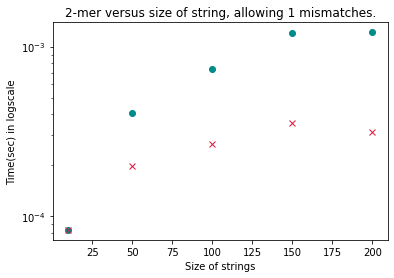

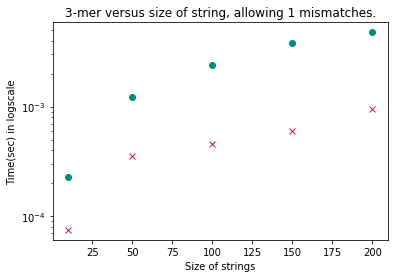

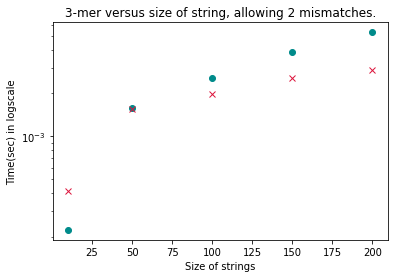

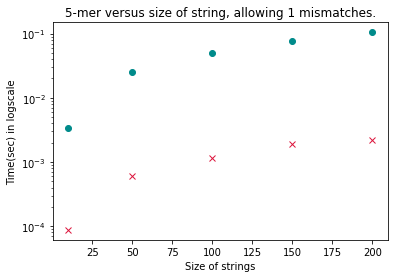

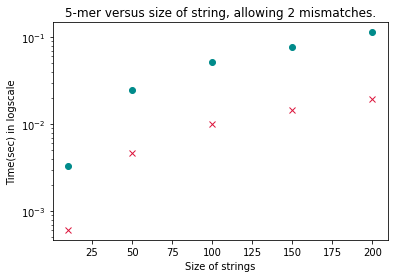

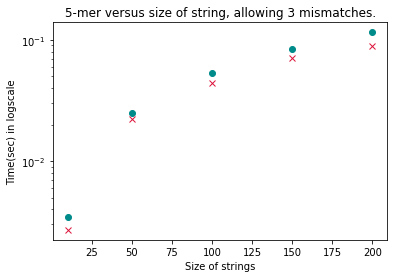

In [18]:
for mer in kmers:
    for mism in mismatches:
        if mism < mer:
            plt.title(str(mer) + '-mer versus size of string, allowing ' + str(mism) + ' mismatches.')
            plt.xlabel('Size of strings')
            plt.ylabel('Time(sec) in logscale')
            plt.yscale("log")
            plt.plot(string_lengths,mm_times[mer][mism][0],'o', color='darkcyan')
            plt.plot(string_lengths,mm_times[mer][mism][1],'x',color='crimson')
            plt.show()

It can be noted from the plots above, that by generating only the neighborhood of the matched patterns in the sequence, we can significantly outperform the simpler approach of exhaustively generating every possible kmer. 

Moreover, note that the performance gain is larger for lower values of mismatches, since in these cases, the neighborhoods generated are smaller than the neighborhoods generated for larger values of mismatches. In the latter case, the performance of the optimized method, approaches the exhaustive search. 